A demonstration of K-means Clustering on Synthetic Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# a blob of synthetic data with 1000 sample points spread across 5 clusters with std_dev 2.0 (returns a 2-dimensional array x)
X, y = make_blobs(n_samples = 1000, cluster_std = 1.0, n_features = 2, centers = 5, random_state = 11, return_centers = False)

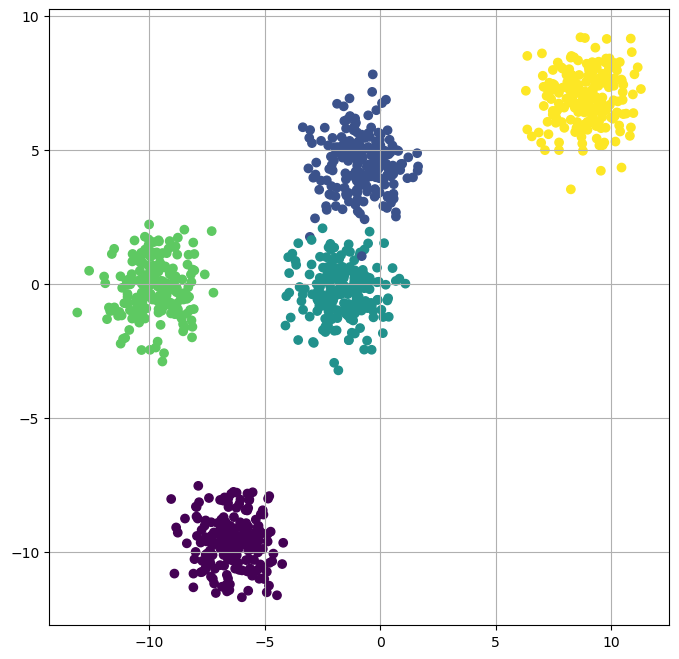

In [3]:
plt.figure(figsize = (8,8))
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [4]:
k = 5 # that is how many initial centers we need

colors = ['green','yellow','blue','cyan','red'] # color scheme for each center

clusters = {} # centers go into this dictionary

for i in range(k):
    
    center = 10*(2*np.random.random((X.shape[1],))-1) #randomly choose a center between -10 and 10 having (x, y)
    points = []
    cluster = {
        'center' : center,
        'points' : points,
        'color' : colors[i]
    }
    clusters[i] = cluster
    
    # clusters is a dictionary that takes index to a dictionary of center, points and colors. 

In [5]:
clusters

{0: {'center': array([ 7.79492685, -5.96933076]),
  'points': [],
  'color': 'green'},
 1: {'center': array([9.83099742, 7.0994265 ]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([3.56088646, 8.12298531]), 'points': [], 'color': 'blue'},
 3: {'center': array([-5.55427125, -7.11480086]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-8.19707623,  7.5861    ]),
  'points': [],
  'color': 'red'}}

Visualizing the blobs and randomly initialized centers

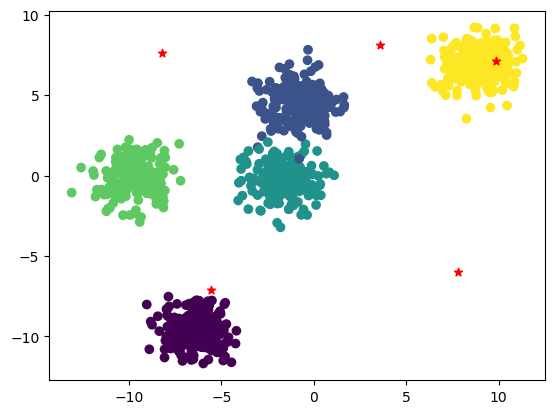

In [6]:
plt.scatter(X[:,0],X[:,1],c=y) # plotting the blobs

for i in clusters:
    center = clusters[i]['center']
    
    plt.scatter(center[0],center[1],marker = '*',c = 'red')

plt.show()

In [7]:
def distance(v1, v2): # returns distance between two points v1 and v2
    
    return np.sqrt(np.sum((v1 - v2)**2))
    

# The E-Step (Assignment of Clusters)

In [8]:
def assign_clusters():
    
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        
        for i in range(k):
            d = distance(curr_x, clusters[i]['center'])
            dist.append(d)
            
        cluster_now = np.argmin(dist) # the index where dist is minimum
        
        clusters[cluster_now]['points'].append(curr_x) # now assign the point to that cluster

# Updating Clusters

In [9]:
def update_clusters(): # M-Step
    
    for idx in range(k):
        
        pts = np.array(clusters[idx]['points']) # points in a particular cluster
        
        if pts.shape[0] > 0: # check that the points is not empty
            
            new_center = pts.mean(axis = 0) # new center is the mean of the points in that cluster
            
            clusters[idx]['center'] = new_center # update the center to new_center
            
            clusters[idx]['points'] = []   # empty the points of that cluster, since it will be updated in the E-step

# Plotting for visualization

In [10]:
def visualize_clusters():
    
    for i in range(k):
        pts = np.array(clusters[i]['points']) # points in this particular cluster
        
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c = 'black',marker = '^')

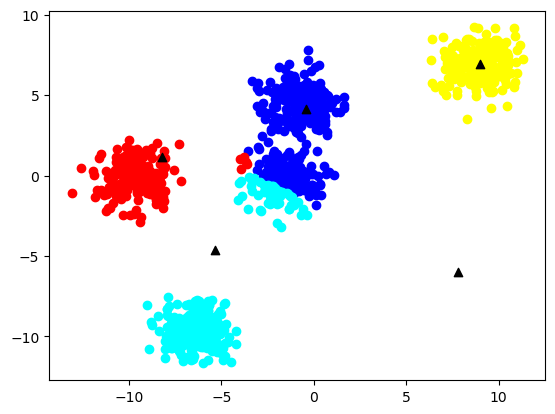

In [11]:
assign_clusters()
update_clusters()
assign_clusters()
visualize_clusters()

The K-means clustering, clusters the data by trying to minimize the 'Total Within Cluster', an objective function whose global minima is computationally expensive to find. We are trying to find the 'Local Minima' of this objective function. 

Since local minima is susceptible to assignment of the initial cluster centers, a sensible assignment of initial centers is important for the clustering to succeed and produce reasonable results. 